In [15]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

Qustion 2

a)
we will solve problem (1) using $l_2$ norm, the solution is:

$ \hat{x} = $

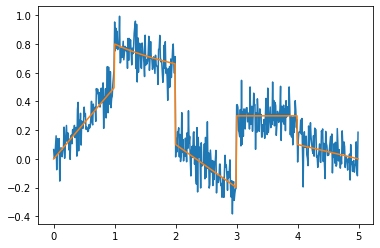

In [16]:
x = np.arange(0,5, 0.01)
n = np.size(x)
one = int(n / 5)
f = np.zeros(x.shape)
f[0:one] = 0.0 + 0.5*x[0:one]
f[(one):2*one] = 0.8 - 0.2*np.log(x[100:200]);
f[(2*one):3*one] = 0.7 - 0.3*x[(2*one):3*one];
f[(3*one):4*one] = 0.3
f[(4*one):(5*one)] = 0.5 - 0.1*x[(4*one):(5*one)];
G = spdiags([-np.ones(n), np.ones(n)], np.array([0, 1]), n-1,n)
etta = 0.1*np.random.randn(np.size(x));
y = f + etta
plt.figure(); plt.plot(x,y); plt.plot(x,f); plt.show()

section (a) - solution using LS with l2 norm

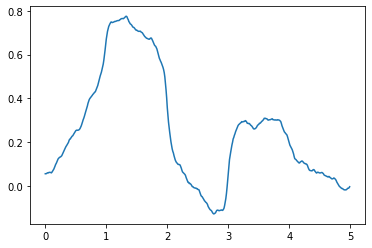

In [17]:
#todo: check it and add text explenation
G = A = np.array(G.toarray())
x_ls =la.inv(np.identity(n) + (80/2)*G.transpose()@G) @ y
plt.figure(); plt.plot(x,x_ls); plt.show()

section (b) - solving (1) using IRLS



In [ ]:
epsilon = 0.001
def get_w(i : int):
    return 1/(np.abs(G))